# Lab3: Visualisasi gradien menggunakan matplotlib

Pada bagian ini kita hendak melakukan visualisasi gradien untuk persamaan 2D. 

Disini kita hendak berfokus pada pemahaman algoritma gradien, namun kita juga akan mempelajari beberapa konsep *scripting* dengan menggunakan Python. Konsep - konsep tersebut antara lain adalah penggunaan *meshgrids* yang sangat berguna untuk menampilkan informasi yang berhubungan dengan titik - titik berbeda di dalam suatu *array*. Selain itu, kita juga akan mempelajari tentang pustaka matplotlib dengan menggunakan plot *quiver* dan *pcolor*.

In [6]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

print('Python: {}'.format(sys.version))
print('NumPy: {}'.format(np.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))

Python: 3.8.3 (default, May 19 2020, 18:47:26) 
[GCC 7.3.0]
NumPy: 1.18.1
Matplotlib: 3.2.1


Sel di atas digunakan untuk mengimpor beberapa pustaka yang kita gunakan dalam sesi komputasi ini. 

Dengan menggunakan NumPy, kita membuat sebuah meshgrid untuk setiap titik $x$ dan $y$. *Meshgrid* ini merupakan *array* dua dimensi yang akan kita gunakan untuk visualisasi. Nilai $z$ pada setiap titik $x$ dan $y$ dihitung dengan menggunakan fungsi sebagai berikut:

In [4]:
# menghasilkan meshgrid 2D
nx, ny = (100, 100)

x = np.linspace(0, 10, nx)
y = np.linspace(0, 10, ny)

xv, yv = np.meshgrid(x,y)

# mendefinisikan fungsi untuk plotting
def f(x,y):
    return x * (y**2)

# menghitung nilai z untuk setiap titik x,y
z = f(xv, yv)

Sekarang kita telah mempunyai *meshgrid* dan telah menghitung $f(x,y)$ untuk seluruh titik di *meshgrid*. Saatnya untuk memvisualisasikan hasilnya melalui *colormap*.

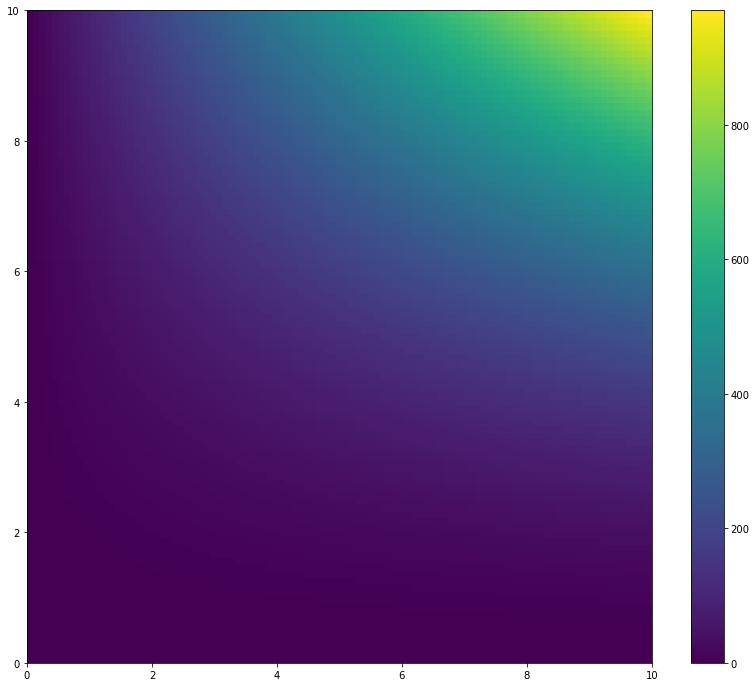

In [7]:
# Membuat colorplot untuk menampilkan data 
plt.figure(figsize=(14,12))
plt.pcolor(xv, yv, z)
plt.colorbar()
plt.show()

Sekarang saatnya kita menambahkan gradien ke dalam plot tersebut. Kita tidak akan menghitung gradien untuk setiap titik di dalam grafik ini, kita akan mendefinisikan *meshgrid* baru dengan titik - titik yang lebih sedikit. Kita dapat memanfaatkan fungsi `gradient()` di dalam pustaka NumPy untuk menghitung gradien pada setiap titik. Di sini kita harus berhati - hati karena prinsip kerja NumPy berbasis *array*, maka luaran dari fungsi ini berupa baris, kolom bukan dalam format $x,y$.

In [9]:
# membuat meshgrid 2D untuk gradien
nx, ny = (10, 10)
x = np.linspace(0, 10, nx)
y = np.linspace(0, 10, ny)
xg, yg = np.meshgrid(x,y)

# menghitung gradien untuk fungsi f(x,y)
# Catatan: NumPy menghasilkan luaran dalam format baris (y), kolom(x)
Gy, Gx = np.gradient(f(xg, yg))

Kemudian kita memvisualisasikan gradien menggunakan *quiverplot*. Arah gradien direpresentasikan melalui anak panah, sedangkan besarannya direpresentasikan oleh panjang panah.

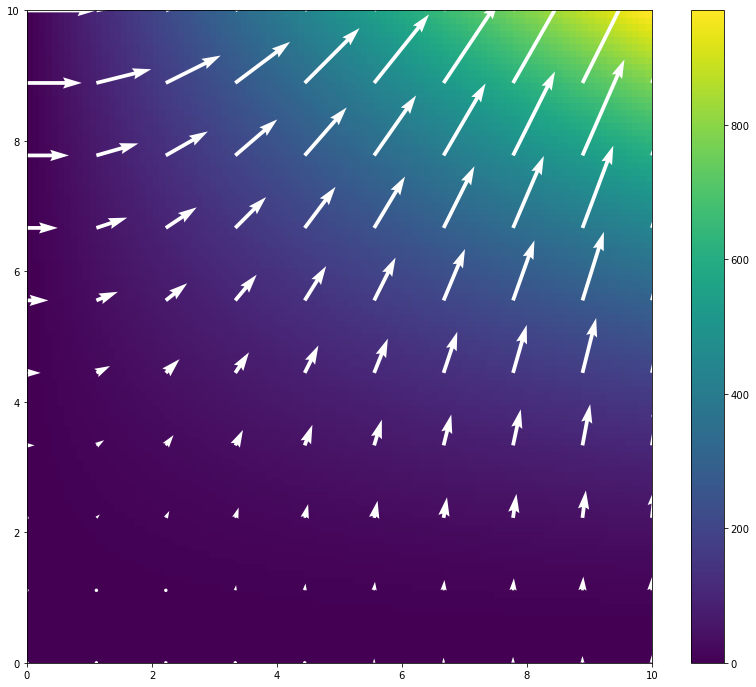

In [11]:
# Memvisualisasikan gradien dengan colorplot
plt.figure(figsize=(14,12))
plt.pcolor(xv, yv, z)
plt.colorbar()
plt.quiver(xg, yg, Gx, Gy, scale = 1000, color = 'w')
plt.show()

Plot di atas nampak sempurna. Anak - anak panah-nya nampak mengarah ke titik maksimum dan besarannya sesuai dengan kemiringan di setiap lokasi. Namun bagaimana kita bisa tahu kalau NumPy telah melakukan kalkulasi dengan benar? Untuk itu kita harus mencari turunan parsial melalui persamaan:

$$\nabla f(x,y) = \begin{bmatrix} \frac{d}{dx}f(x,y) && \frac{d}{dy}f(x,y) \end{bmatrix}$$

$$\nabla f(x,y) = \begin{bmatrix}y^2&&2xy\end{bmatrix}$$

Dengan mendefinisikan fungsi sebagai berikut:

In [12]:
# menghitung gradien fungsi: f(x,y) = xy^2
def ddx(x,y):
    return y ** 2

def ddy(x,y):
    return (2 * y * x)

Gx = ddx(xg,yg)
Gy = ddy(xg,yg)

Kemudian kita memvisualisasikannya:

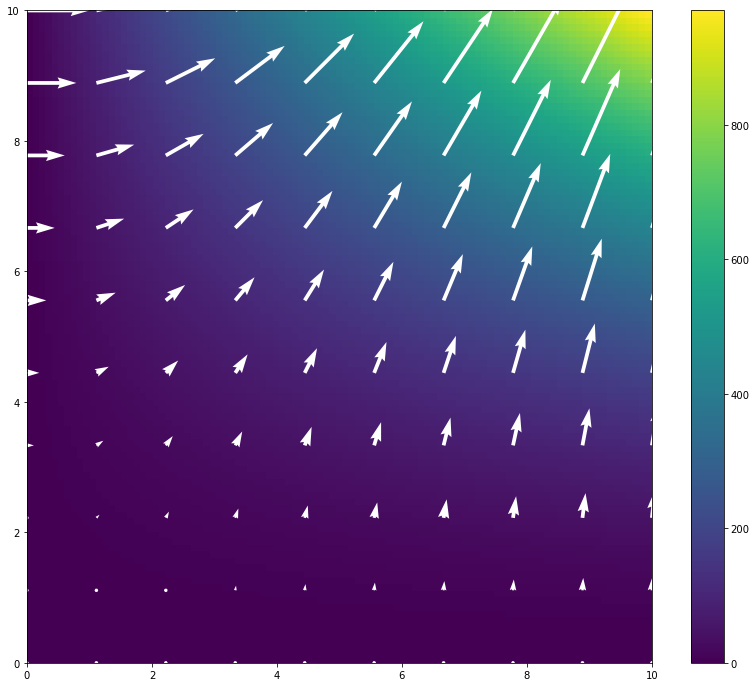

In [14]:
# Plot
plt.figure(figsize=(14,12))
plt.pcolor(xv, yv, z)
plt.colorbar()
plt.quiver(xg, yg, Gx, Gy, scale = 1000, color = 'w')
#plt.title('Visualisasi [$y^2$, $2xy$]')
plt.show()